In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('/content/heart.csv')
data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,M,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,M,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,F,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,M,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,F,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,F,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,M,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,M,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,M,0,130,131,0,1,115,1,1.2,1,1,3,0


# **Data preprocessing**:

In [4]:
#displaying the first five rows of dataset 
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,M,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,M,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,F,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,M,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,F,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
#displaying the last five rows of dataset 
data.tail()


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,F,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,M,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,M,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,M,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,F,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
#displaying the number of rows and columns
data.shape

(303, 14)

In [7]:
#displaying the column names, count, data_type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    object 
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(12), object(1)
memory usage: 33.3+ KB


In [8]:
#checking for any null values column_wise
data.isna().any()

age         False
sex         False
cp          False
trtbps      False
chol        False
fbs         False
restecg     False
thalachh    False
exng        False
oldpeak     False
slp         False
caa         False
thall       False
output      False
dtype: bool

In [9]:
#checking over_all for any null value
data.isna().any().sum()

0

In [10]:
data['chol'].fillna(value=data['chol'].mean(), inplace=True)
data['fbs'].fillna(value=data['fbs'].mean(), inplace=True)
data['restecg'].fillna(value=data['restecg'].mean(), inplace=True)

In [11]:
#Identifying the duplicates
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
298    False
299    False
300    False
301    False
302    False
Length: 303, dtype: bool

In [12]:
data.describe()

,age,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Using Scatter Plot

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

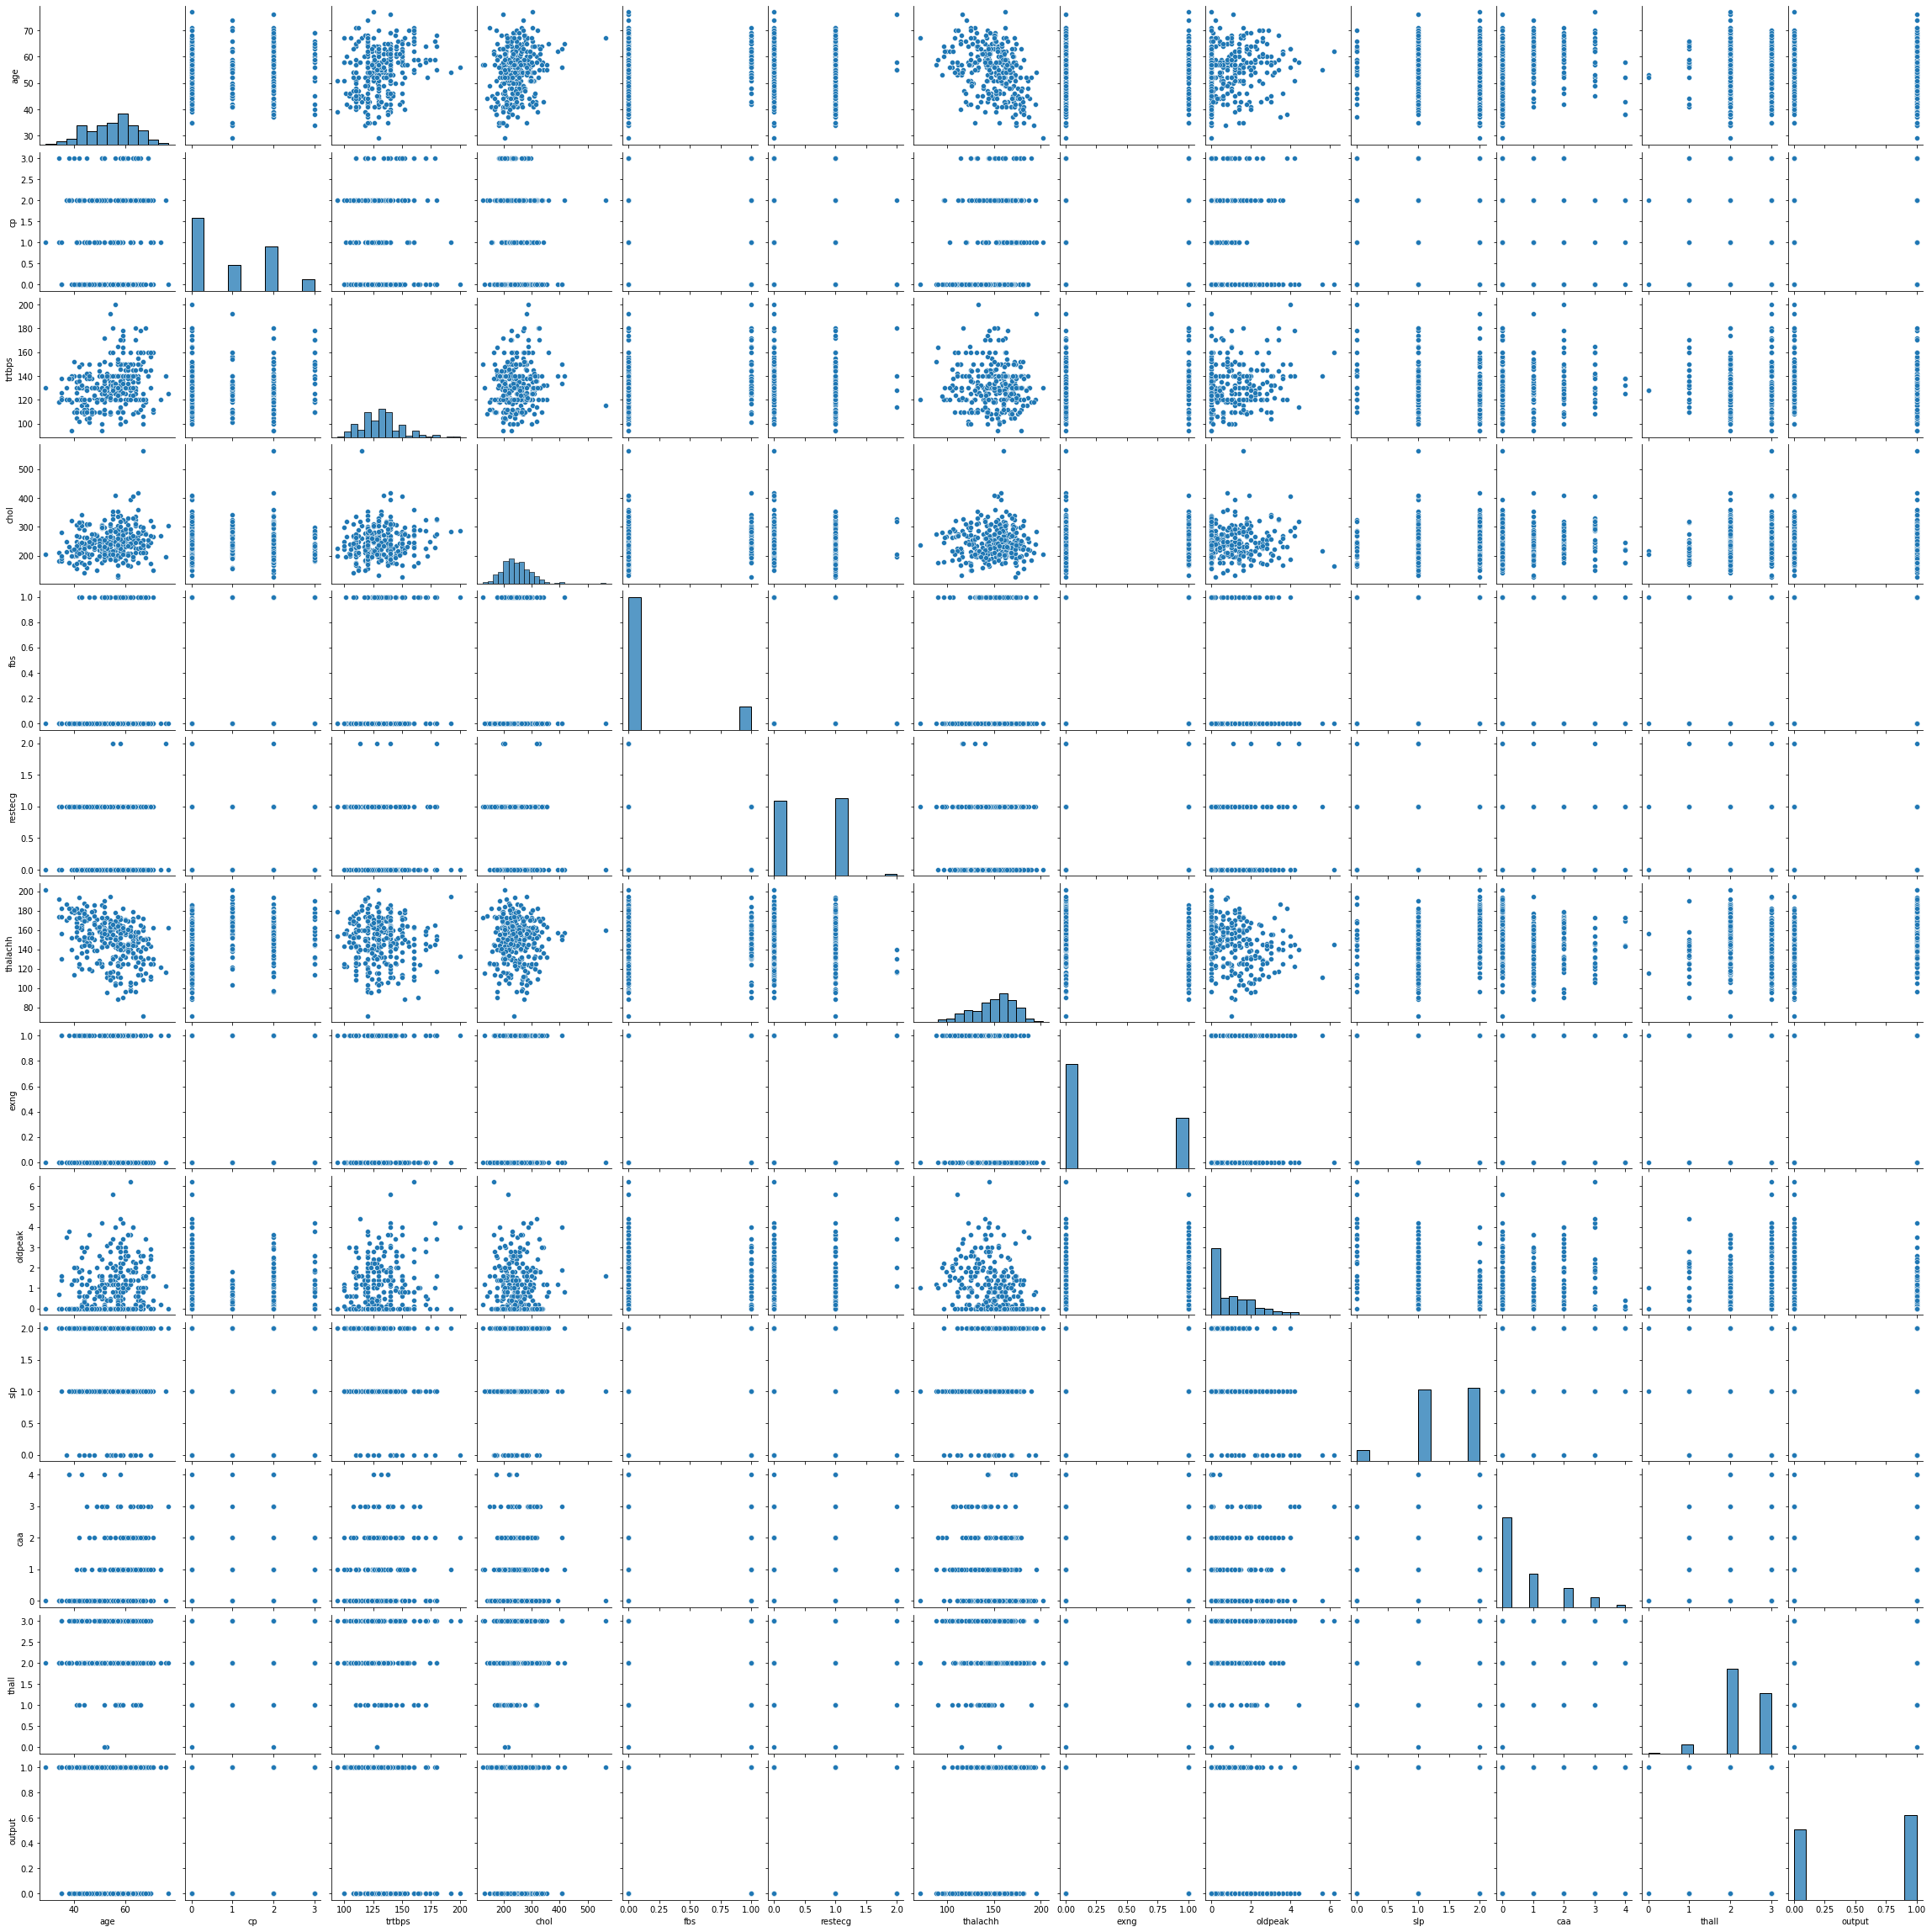

In [14]:
sns.pairplot(data)

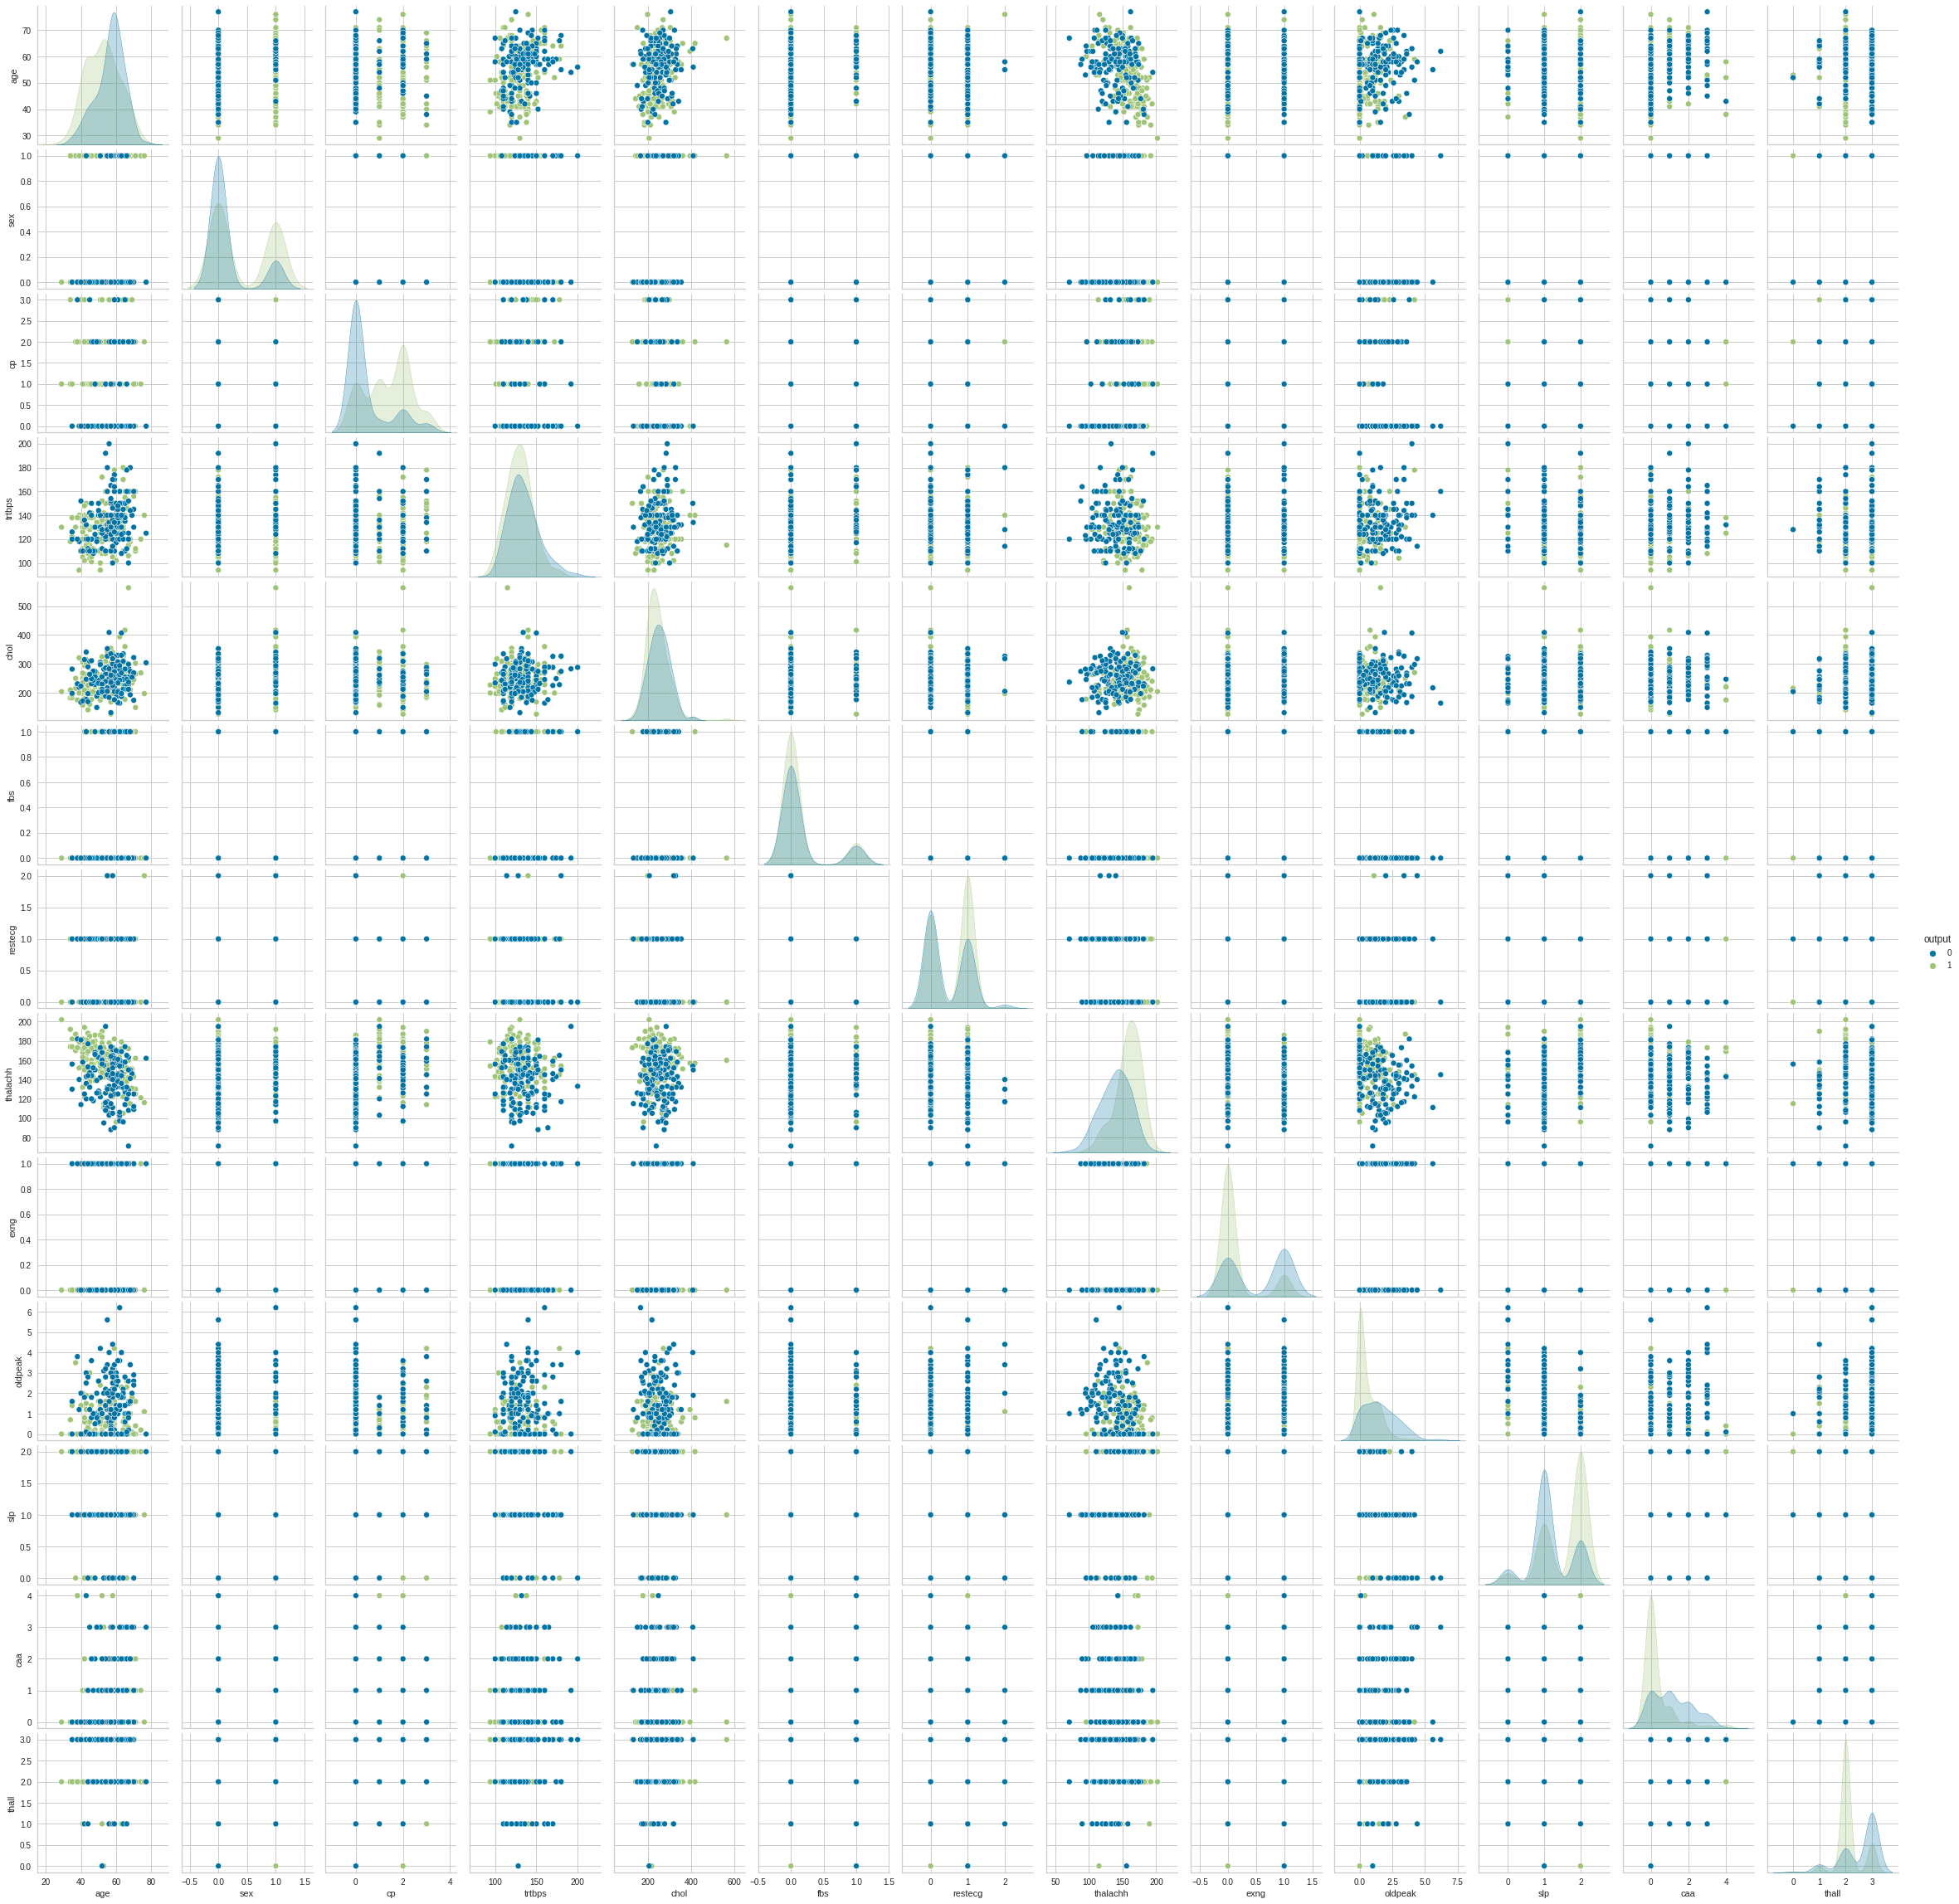

In [79]:
g = sns.pairplot(data, hue='output')

# ***VISUALIZATIONS***

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


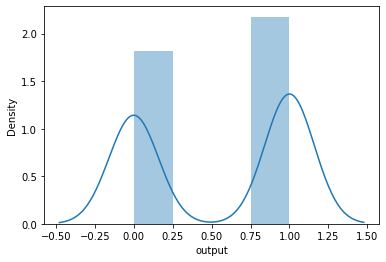

In [15]:
sns.distplot(data['output']) #distogram 

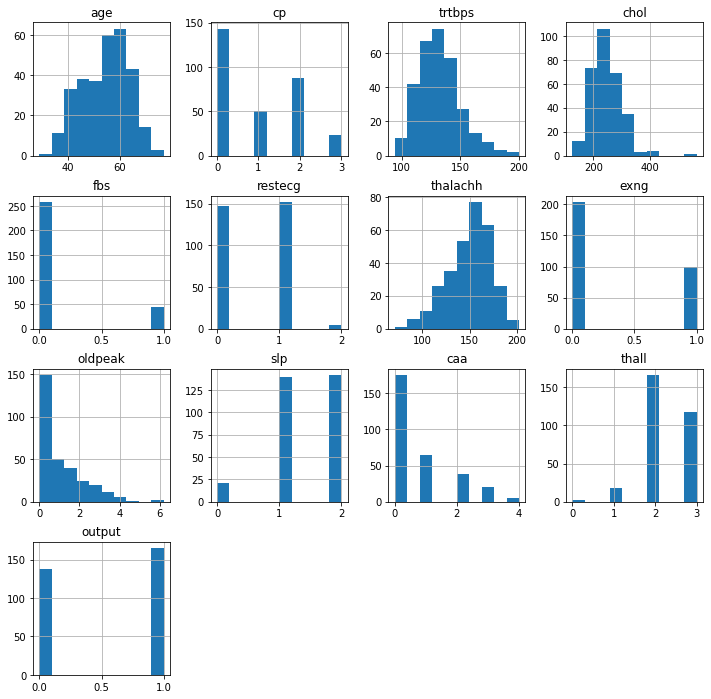

In [16]:
data.hist(figsize = (12, 12))
plt.show()


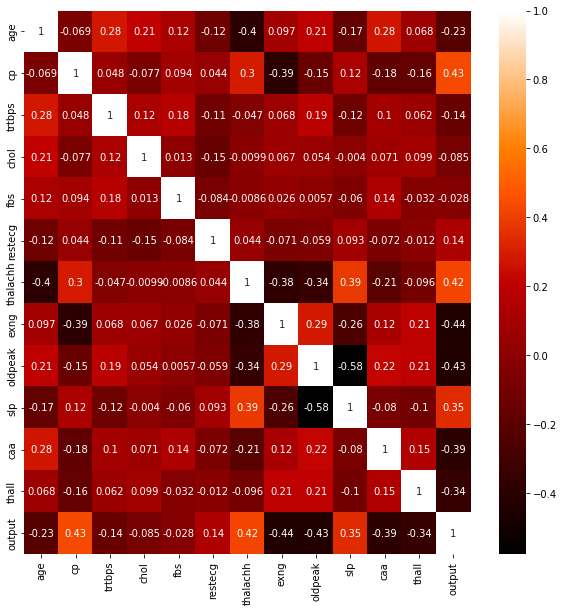

In [17]:
plt.figure(figsize = (10, 10))
sns.heatmap(data.corr(), annot=True, cmap="gist_heat")
plt.show()

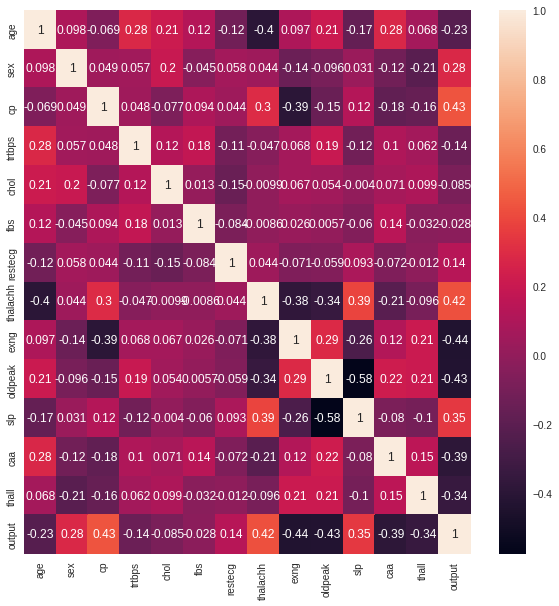

In [80]:
plt.figure(figsize = (10, 10))
sns.heatmap(data.corr(), annot=True)
plt.show()

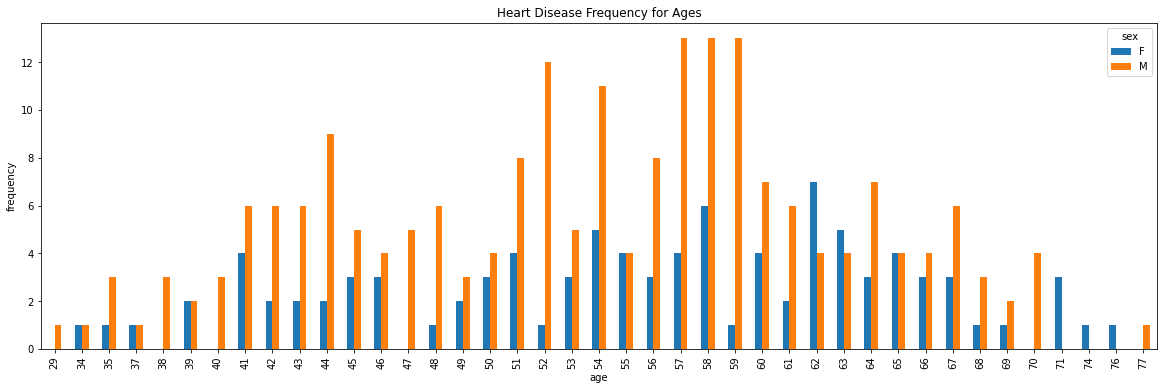

In [18]:
pd.crosstab(data.age, data.sex).plot(kind="bar", figsize=(20, 6))
plt.title("Heart Disease Frequency for Ages")
plt.xlabel("age")
plt.ylabel("frequency")
plt.show()


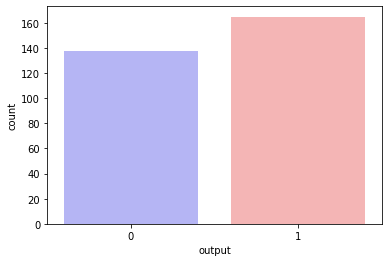

In [19]:
sns.countplot(x="output", data=data, palette="bwr")
plt.show()

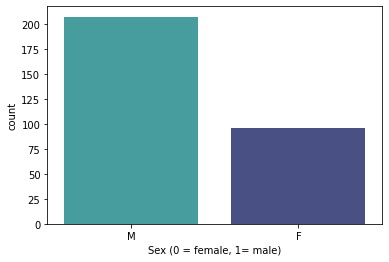

In [20]:
sns.countplot(x='sex', data=data, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

Identifying the proportion of Male and Female students

In [21]:
countFemale = len(data[data.sex == 'F'])
countMale = len(data[data.sex == 'M'])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(data.sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(data.sex))*100)))

Percentage of Female Patients: 31.68%
Percentage of Male Patients: 68.32%


Identifying the number of patients who gets heart attack and who doesn't get

In [22]:
data.output.value_counts()

1    165
0    138
Name: output, dtype: int64

Identifying Patients with disease and without disease

In [23]:
countNoDisease = len(data[data.output == 0])
countHaveDisease = len(data[data.output == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(data.output))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(data.output))*100)))

Percentage of Patients Haven't Heart Disease: 45.54%
Percentage of Patients Have Heart Disease: 54.46%


Comparing age and thalachh features to decide whether a person gets heart stroke or not

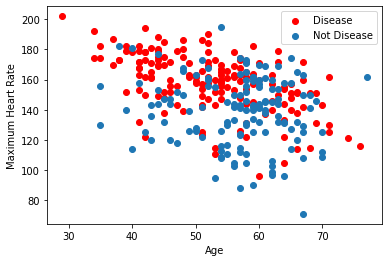

In [24]:
plt.scatter(x=data.age[data.output==1], y=data.thalachh[(data.output==1)], c="red")
plt.scatter(x=data.age[data.output==0], y=data.thalachh[(data.output==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

Comparing age and cholestrol features to decide whether a person gets heart stroke or not

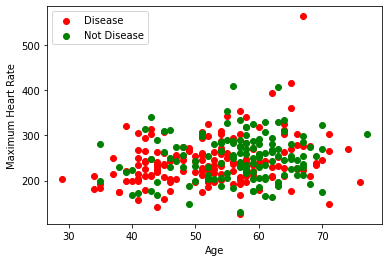

In [25]:
plt.scatter(x=data.age[data.output==1], y=data.chol[(data.output==1)], c="red")
plt.scatter(x=data.age[data.output==0], y=data.chol[(data.output==0)], c="green")
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

# **BOX PLOT- VISUALIZATION**

In [26]:
import seaborn

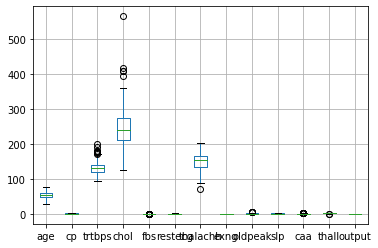

In [27]:
data.boxplot()

# **INTER QUARTILE RANGE**

In [28]:
#calculating Q1, Q3, IQR for chol feature
Q1 = np.percentile(data['chol'], 25,
				interpolation = 'midpoint')

Q3 = np.percentile(data['chol'], 75,
				interpolation = 'midpoint')
IQR = Q3 - Q1

In [29]:
IQR

63.5

Removing Outliers: 

Outliers are undesired values but, Outliers can be meaningful and informative about the subject_area and data collection process, it is necessary to understand the nature of outlier occurence and it is a bad practice to remove data points just to produce better results If the extreme value is a legitimate observation that is a natural part of the population studying, then we should not remove the outliers in the dataset.

Here, we did detect all the outliers and we did not remove the outliers

In [36]:
import seaborn as sns
import pandas as pd


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


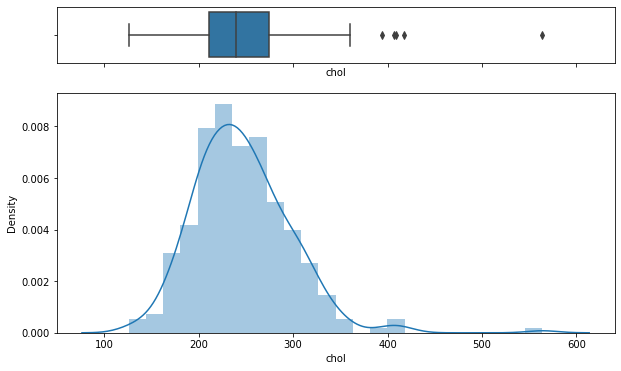

In [40]:
fig, (ax_box, ax_dist) = plt.subplots(nrows=2, sharex=True, figsize=(10, 6), gridspec_kw={"height_ratios": (.20, .85)})
 
# Plot the boxplot
sns.boxplot(data["chol"], ax=ax_box)

# Plot the distplot
sns.distplot(data["chol"], ax=ax_dist)
 
# Remove xlabel for the boxplot
ax_box.set(xlabel='chol');

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


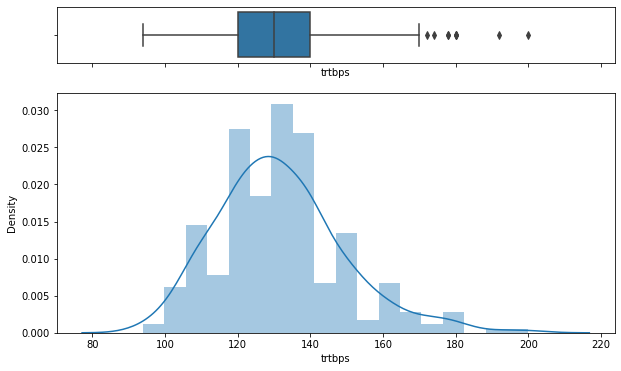

In [41]:
fig, (ax_box, ax_dist) = plt.subplots(nrows=2, sharex=True, figsize=(10, 6), gridspec_kw={"height_ratios": (.20, .85)})
 
# Plot the boxplot
sns.boxplot(data["trtbps"], ax=ax_box)

# Plot the distplot
sns.distplot(data["trtbps"], ax=ax_dist)
 
# Remove xlabel for the boxplot
ax_box.set(xlabel='trtbps');

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


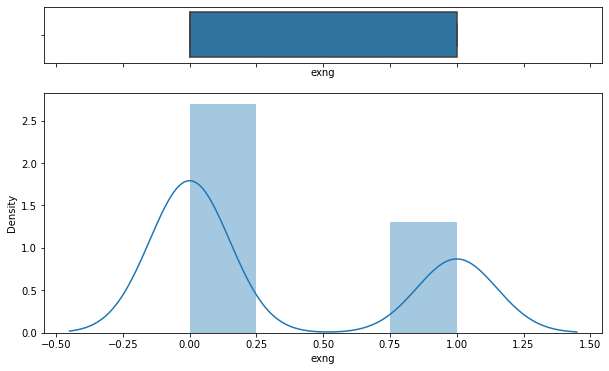

In [42]:
fig, (ax_box, ax_dist) = plt.subplots(nrows=2, sharex=True, figsize=(10, 6), gridspec_kw={"height_ratios": (.20, .85)})
 
# Plot the boxplot
sns.boxplot(data["exng"], ax=ax_box)

# Plot the distplot
sns.distplot(data["exng"], ax=ax_dist)
 
# Remove xlabel for the boxplot
ax_box.set(xlabel='exng');

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


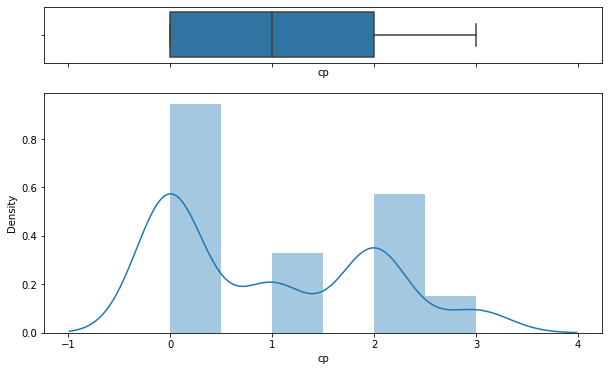

In [43]:
fig, (ax_box, ax_dist) = plt.subplots(nrows=2, sharex=True, figsize=(10, 6), gridspec_kw={"height_ratios": (.20, .85)})
 
# Plot the boxplot
sns.boxplot(data["cp"], ax=ax_box)

# Plot the distplot
sns.distplot(data["cp"], ax=ax_dist)
 
# Remove xlabel for the boxplot
ax_box.set(xlabel='cp');

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


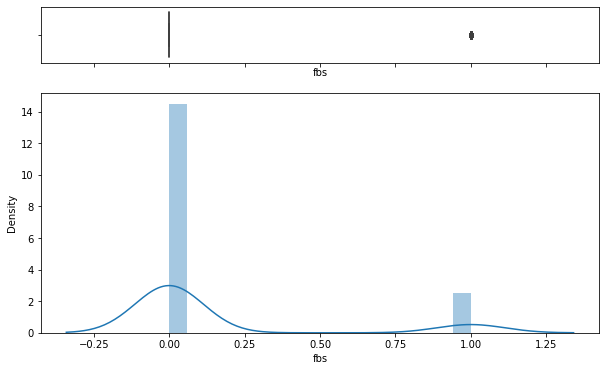

In [44]:
fig, (ax_box, ax_dist) = plt.subplots(nrows=2, sharex=True, figsize=(10, 6), gridspec_kw={"height_ratios": (.20, .85)})
 
# Plot the boxplot
sns.boxplot(data["fbs"], ax=ax_box)

# Plot the distplot
sns.distplot(data["fbs"], ax=ax_dist)
 
# Remove xlabel for the boxplot
ax_box.set(xlabel='fbs');

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


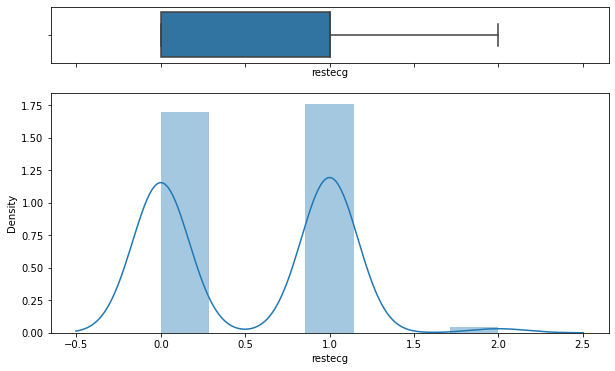

In [45]:
fig, (ax_box, ax_dist) = plt.subplots(nrows=2, sharex=True, figsize=(10, 6), gridspec_kw={"height_ratios": (.20, .85)})
 
# Plot the boxplot
sns.boxplot(data["restecg"], ax=ax_box)

# Plot the distplot
sns.distplot(data["restecg"], ax=ax_dist)
 
# Remove xlabel for the boxplot
ax_box.set(xlabel='restecg');

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


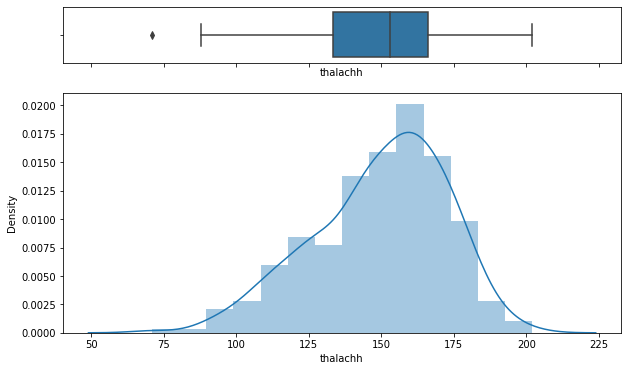

In [46]:
fig, (ax_box, ax_dist) = plt.subplots(nrows=2, sharex=True, figsize=(10, 6), gridspec_kw={"height_ratios": (.20, .85)})
 
# Plot the boxplot
sns.boxplot(data["thalachh"], ax=ax_box)

# Plot the distplot
sns.distplot(data["thalachh"], ax=ax_dist)
 
# Remove xlabel for the boxplot
ax_box.set(xlabel='thalachh');

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


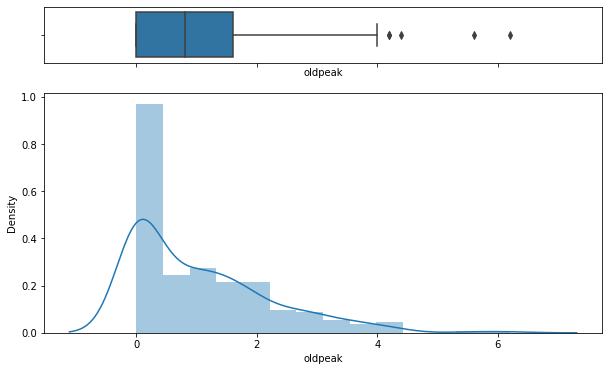

In [47]:
fig, (ax_box, ax_dist) = plt.subplots(nrows=2, sharex=True, figsize=(10, 6), gridspec_kw={"height_ratios": (.20, .85)})
 
# Plot the boxplot
sns.boxplot(data["oldpeak"], ax=ax_box)

# Plot the distplot
sns.distplot(data["oldpeak"], ax=ax_dist)
 
# Remove xlabel for the boxplot
ax_box.set(xlabel='oldpeak');

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


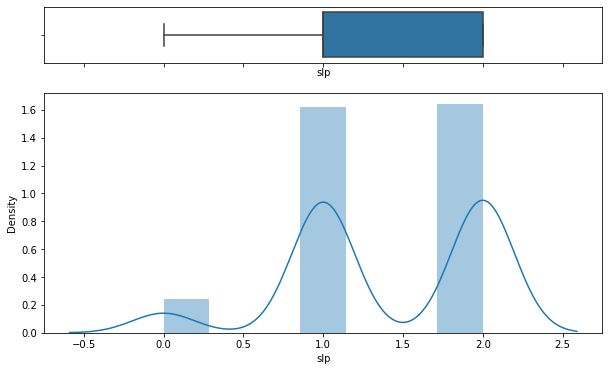

In [48]:
fig, (ax_box, ax_dist) = plt.subplots(nrows=2, sharex=True, figsize=(10, 6), gridspec_kw={"height_ratios": (.20, .85)})
 
# Plot the boxplot
sns.boxplot(data["slp"], ax=ax_box)

# Plot the distplot
sns.distplot(data["slp"], ax=ax_dist)
 
# Remove xlabel for the boxplot
ax_box.set(xlabel='slp');

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


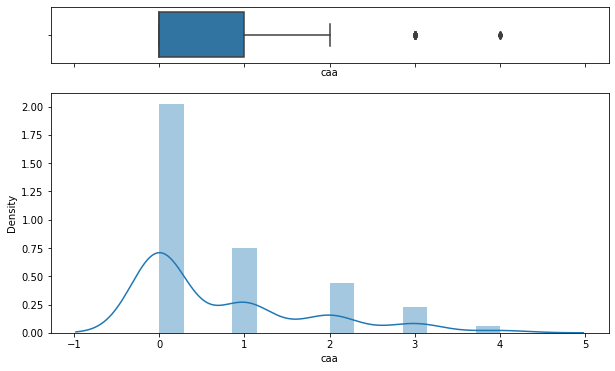

In [49]:
fig, (ax_box, ax_dist) = plt.subplots(nrows=2, sharex=True, figsize=(10, 6), gridspec_kw={"height_ratios": (.20, .85)})
 
# Plot the boxplot
sns.boxplot(data["caa"], ax=ax_box)

# Plot the distplot
sns.distplot(data["caa"], ax=ax_dist)
 
# Remove xlabel for the boxplot
ax_box.set(xlabel='caa');

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


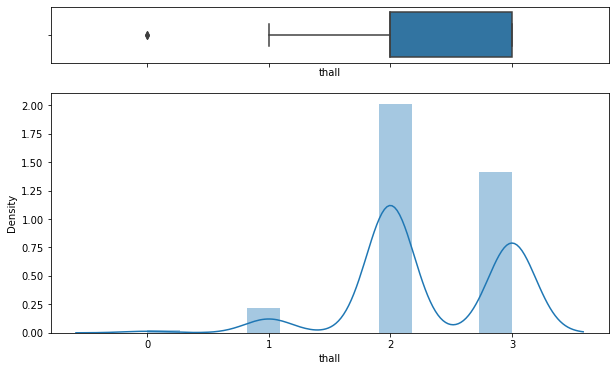

In [52]:
fig, (ax_box, ax_dist) = plt.subplots(nrows=2, sharex=True, figsize=(10, 6), gridspec_kw={"height_ratios": (.20, .85)})
 
# Plot the boxplot
sns.boxplot(data["thall"], ax=ax_box)

# Plot the distplot
sns.distplot(data["thall"], ax=ax_dist)
 
# Remove xlabel for the boxplot
ax_box.set(xlabel='thall');

Feature scalling

normalization and standardization

min_max_scaling

In [51]:
data=data.replace('?',0) #replace null values with 0
data['trtbps']=data['trtbps'].astype(int) #converting to int from string in dataset all the numbers r stored as strings
data['chol']=data['chol'].astype(int)
data[['trtbps','exng','cp','age']]=data[['trtbps','exng','cp','age']].astype(float)
y=data['output'].astype(float)
data=data.replace('M',0)
data=data.replace('F',1)
x=data[['age','sex','cp','trtbps','chol','fbs','restecg','thalachh','exng','oldpeak','slp','caa','thall']]

In [53]:
# calling the min_max_scaling function
from sklearn.preprocessing import MinMaxScaler # minmax scaler used to bring all the values to o t0 1
sclar=MinMaxScaler() 
x_small=sclar.fit_transform(x) #fit transform is used to get the values to specific scale
x_small

array([[0.70833333, 0.        , 1.        , ..., 0.        , 0.        ,
        0.33333333],
       [0.16666667, 0.        , 0.66666667, ..., 0.        , 0.        ,
        0.66666667],
       [0.25      , 1.        , 0.33333333, ..., 1.        , 0.        ,
        0.66666667],
       ...,
       [0.8125    , 0.        , 0.        , ..., 0.5       , 0.5       ,
        1.        ],
       [0.58333333, 0.        , 0.        , ..., 0.5       , 0.25      ,
        1.        ],
       [0.58333333, 1.        , 0.33333333, ..., 0.5       , 0.25      ,
        0.66666667]])

completion of data cleaning 

In [54]:
import pandas as pd
data



,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63.0,0,3.0,145.0,233,1,0,150,0.0,2.3,0,0,1,1
1,37.0,0,2.0,130.0,250,0,1,187,0.0,3.5,0,0,2,1
2,41.0,1,1.0,130.0,204,0,0,172,0.0,1.4,2,0,2,1
3,56.0,0,1.0,120.0,236,0,1,178,0.0,0.8,2,0,2,1
4,57.0,1,0.0,120.0,354,0,1,163,1.0,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57.0,1,0.0,140.0,241,0,1,123,1.0,0.2,1,0,3,0
299,45.0,0,3.0,110.0,264,0,1,132,0.0,1.2,1,0,3,0
300,68.0,0,0.0,144.0,193,1,1,141,0.0,3.4,1,2,3,0
301,57.0,0,0.0,130.0,131,0,1,115,1.0,1.2,1,1,3,0


#Data Exploration and Analysis

Roadmap to exploration and analysis

* Understand the problem: We'll look at each variable and do a philosophical analysis about their meaning and importance for this problem.

* Univariable study: We'll just focus on the dependent variable ('Composite Score') and try to know a little bit more about it.

* Multivariate study: We'll try to understand how the dependent variable and independent variables relate.

* Basic cleaning: We'll clean the dataset and handle the missing data, outliers and categorical variables.

* Test assumptions: We'll check if our data meets the assumptions required by most multivariate techniques.


skewness and kurtosis

In [55]:
data['chol'].describe()

count    303.000000
mean     246.264026
std       51.830751
min      126.000000
25%      211.000000
50%      240.000000
75%      274.500000
max      564.000000
Name: chol, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


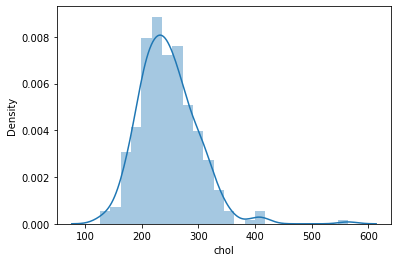

In [56]:
sns.distplot(data['chol']);

In [57]:
#skewness and kurtosis
data.kurt()


age        -0.542167
sex        -1.382961
cp         -1.193071
trtbps      0.929054
chol        4.505423
fbs         1.959678
restecg    -1.362673
thalachh   -0.061970
exng       -1.458317
oldpeak     1.575813
slp        -0.627521
caa         0.839253
thall       0.297915
output     -1.980783
dtype: float64

In [58]:
data.skew()

age        -0.202463
sex         0.791335
cp          0.484732
trtbps      0.713768
chol        1.143401
fbs         1.986652
restecg     0.162522
thalachh   -0.537410
exng        0.742532
oldpeak     1.269720
slp        -0.508316
caa         1.310422
thall      -0.476722
output     -0.179821
dtype: float64

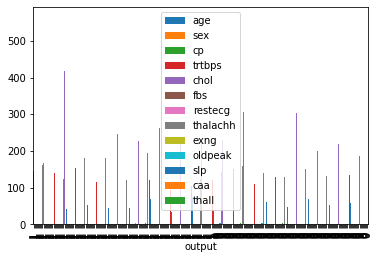

In [59]:
# using a function df.plot.bar()
data.plot.bar('output')

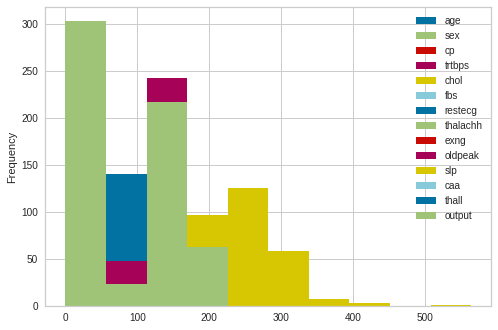

In [82]:
data.plot.hist()

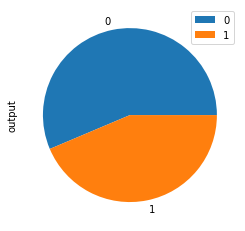

In [66]:
data.groupby(['sex']).sum().plot(kind='pie', y='output')

In [65]:
count = data.groupby(['output']).count()
print(count)

        age  sex   cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  \
output                                                                       
0       138  138  138     138   138  138      138       138   138      138   
1       165  165  165     165   165  165      165       165   165      165   

        slp  caa  thall  
output                   
0       138  138    138  
1       165  165    165  


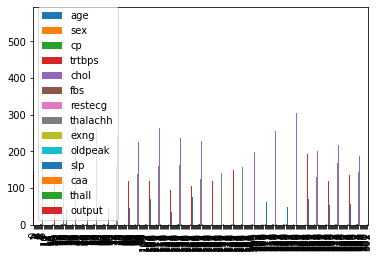

In [62]:
# using a function df.plot.bar()
data.plot.bar()

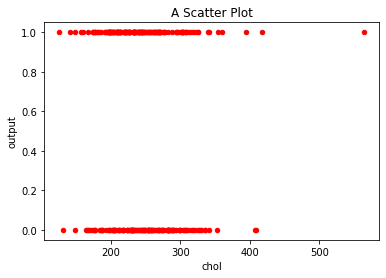

In [61]:
ax=data.plot( x='chol', y='output', kind='scatter', c='r',
 title='A Scatter Plot', xlabel='chol', ylabel='output')

plt.show()

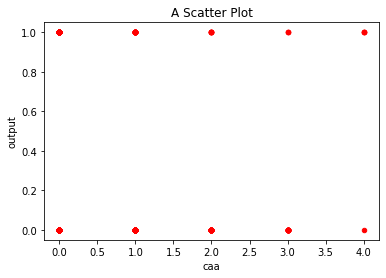

In [60]:
ax=data.plot( x='caa', y='output', kind='scatter', c='r',
 title='A Scatter Plot', xlabel='caa', ylabel='output')

plt.show()

##Multivariate Study

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb1d9e075b0>,
      dtype=object)

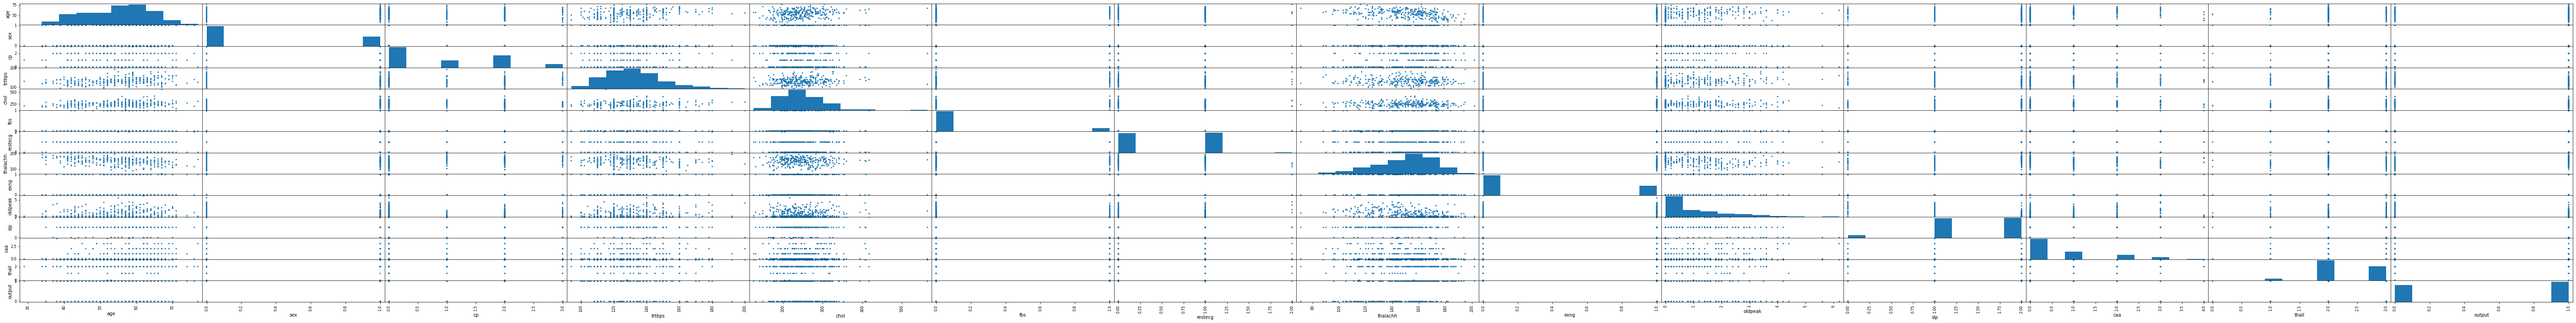

In [68]:
import pandas as pd
pd.plotting.scatter_matrix(data.iloc[:,:20], alpha=0.99, diagonal='hist', figsize=(100,12))

###Correlation Matrix

In [70]:
Cor=data.corr()

###Correlation matrix (heatmap style)

In [71]:
data.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,0.098447,1.000000,0.049353,0.056769,0.197912,-0.045032,0.058196,0.044020,-0.141664,-0.096093,0.030711,-0.118261,-0.210041,0.280937
cp,-0.068653,0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,-0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,-0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,-0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


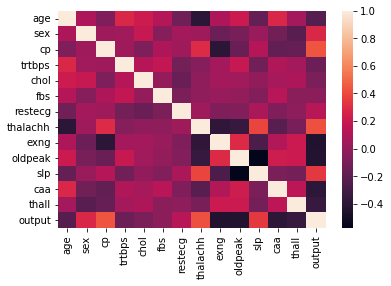

In [77]:
sns.heatmap(data.corr())

In [73]:
#add a threshold value to correlation 
corr_mask= Cor.apply(lambda col: (abs(col)> 0.75) & (abs(col)!=1))

#True values in each column
corr_mask.sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

###Rank 1D

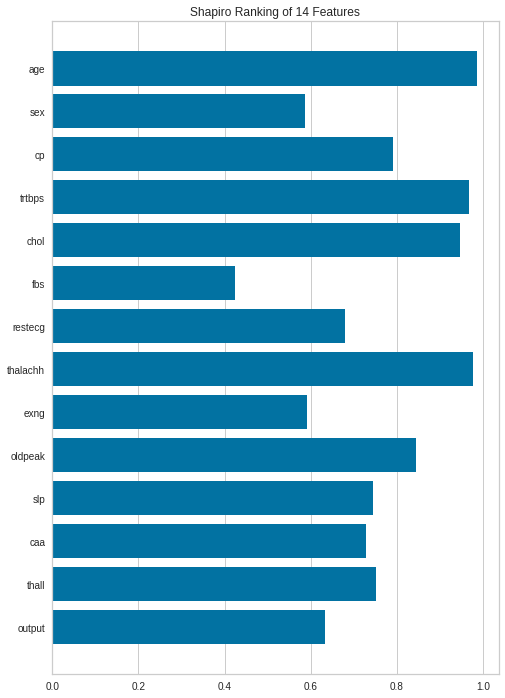

In [78]:
from yellowbrick.features import Rank1D

data_core=data
fig, ax = plt.subplots(figsize=(8, 12))
visualizer = Rank1D(left=True, bottom=True)
visualizer.fit_transform(data_core)
visualizer.poof()

###Rank 2D

In [ ]:
from yellowbrick.features import Rank2D

data_core=data
fig, ax=plt.subplots(figsize=(25,20))

visualizer = Rank2D(algorithm="pearson")

visualizer.fit_transform(data_core)
visualizer.poof()

###Feature Importance

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from yellowbrick.features import FeatureImportances

X_sample=data.drop("chol",axis=1)
y_sample=data["chol"]

clf = DecisionTreeClassifier()
visualizer = FeatureImportances(clf)
visualizer.fit(X_sample, y_sample)
visualizer.poof()


In [ ]:
import pandas as pd
import seaborn as sn
df = pd.read_csv("heart.csv")
df.chol.describe()

In [ ]:
mean = df.chol.mean()
mean

In [ ]:
std_deviation = df.chol.std()
std_deviation

In [ ]:
mean-3*std_deviation

In [ ]:
mean+3*std_deviation

normalizaton


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


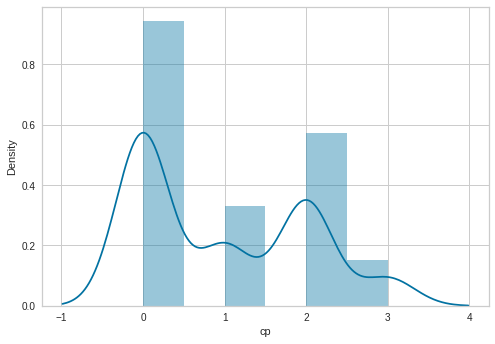

In [84]:
sns.distplot(data['cp'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


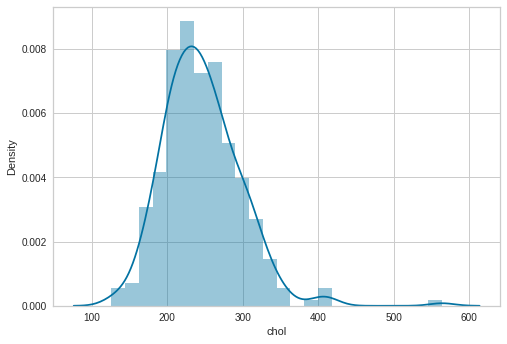

In [85]:
sns.distplot(data['chol'])

Max absolute scaling

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


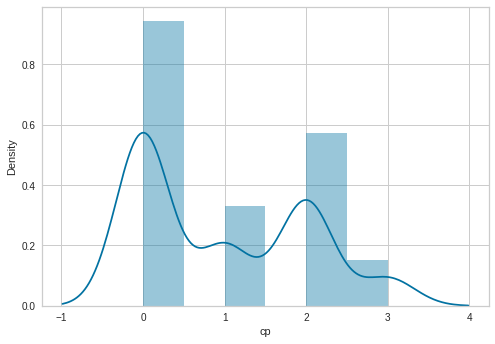

In [86]:
## value / max_value
data_temp = data.copy()
data_temp['cp'] = data_temp['cp'] / data['cp'].abs().max()
sns.distplot(data['cp'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


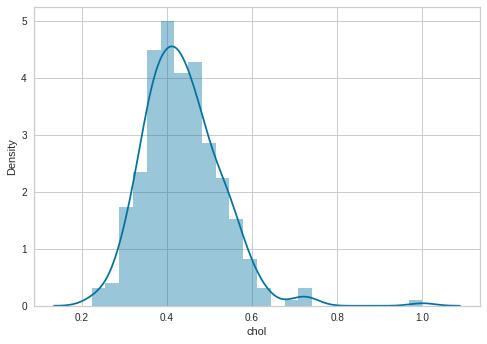

In [87]:
data_temp['chol'] =data_temp['chol'] /data_temp['chol'].abs().max()
sns.distplot(data_temp['chol'])


# original_value = scaled_value * max
Min-Max Scaling
# (value - min) / (max - min)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


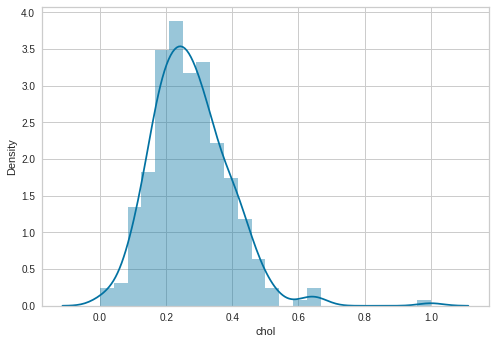

In [88]:
data_temp = data.copy()
data_temp['chol'] = (data_temp['chol'] - data_temp['chol'].min()) / (data_temp['chol'].max() - data_temp['chol'].min())
sns.distplot(data_temp['chol'])

# original_value = scaled_value * (max-min) + min

###Log Transformation

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


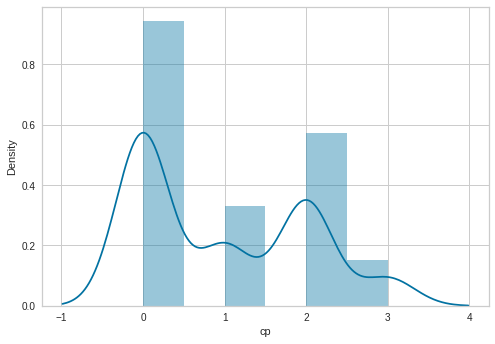

In [93]:
sns.distplot(data['cp'])


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


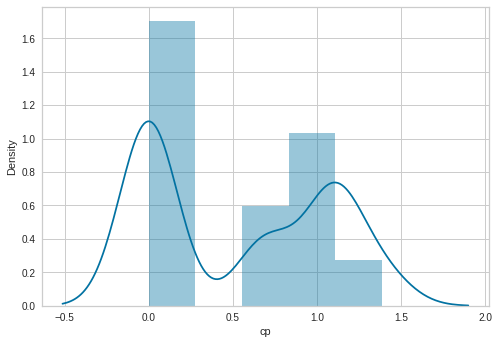

In [92]:
data_temp = data.copy()
data_temp['cp'] = np.log(data_temp['cp']+1)
sns.distplot(data_temp['cp'])
